## bill_authentication.csv

In [ ]:
!pip install dask
!pip install dask-ml
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LogisticRegression
from dask_ml.metrics import accuracy_score
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()

Saving bill_authentication.csv to bill_authentication.csv


{'bill_authentication.csv': b'Variance,Skewness,Curtosis,Entropy,Class\r\n3.6216,8.6661,-2.8073,-0.44699,0\r\n4.5459,8.1674,-2.4586,-1.4621,0\r\n3.866,-2.6383,1.9242,0.10645,0\r\n3.4566,9.5228,-4.0112,-3.5944,0\r\n0.32924,-4.4552,4.5718,-0.9888,0\r\n4.3684,9.6718,-3.9606,-3.1625,0\r\n3.5912,3.0129,0.72888,0.56421,0\r\n2.0922,-6.81,8.4636,-0.60216,0\r\n3.2032,5.7588,-0.75345,-0.61251,0\r\n1.5356,9.1772,-2.2718,-0.73535,0\r\n1.2247,8.7779,-2.2135,-0.80647,0\r\n3.9899,-2.7066,2.3946,0.86291,0\r\n1.8993,7.6625,0.15394,-3.1108,0\r\n-1.5768,10.843,2.5462,-2.9362,0\r\n3.404,8.7261,-2.9915,-0.57242,0\r\n4.6765,-3.3895,3.4896,1.4771,0\r\n2.6719,3.0646,0.37158,0.58619,0\r\n0.80355,2.8473,4.3439,0.6017,0\r\n1.4479,-4.8794,8.3428,-2.1086,0\r\n5.2423,11.0272,-4.353,-4.1013,0\r\n5.7867,7.8902,-2.6196,-0.48708,0\r\n0.3292,-4.4552,4.5718,-0.9888,0\r\n3.9362,10.1622,-3.8235,-4.0172,0\r\n0.93584,8.8855,-1.6831,-1.6599,0\r\n4.4338,9.887,-4.6795,-3.7483,0\r\n0.7057,-5.4981,8.3368,-2.8715,0\r\n1.1432,-3.74

In [ ]:

df = dd.read_csv('bill_authentication.csv')

In [ ]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Checking missing value

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Dask Series Structure:
npartitions=1
Class       int64
Variance      ...
dtype: int64
Dask Name: dataframe-sum-agg, 4 graph layers


## Pair Plot

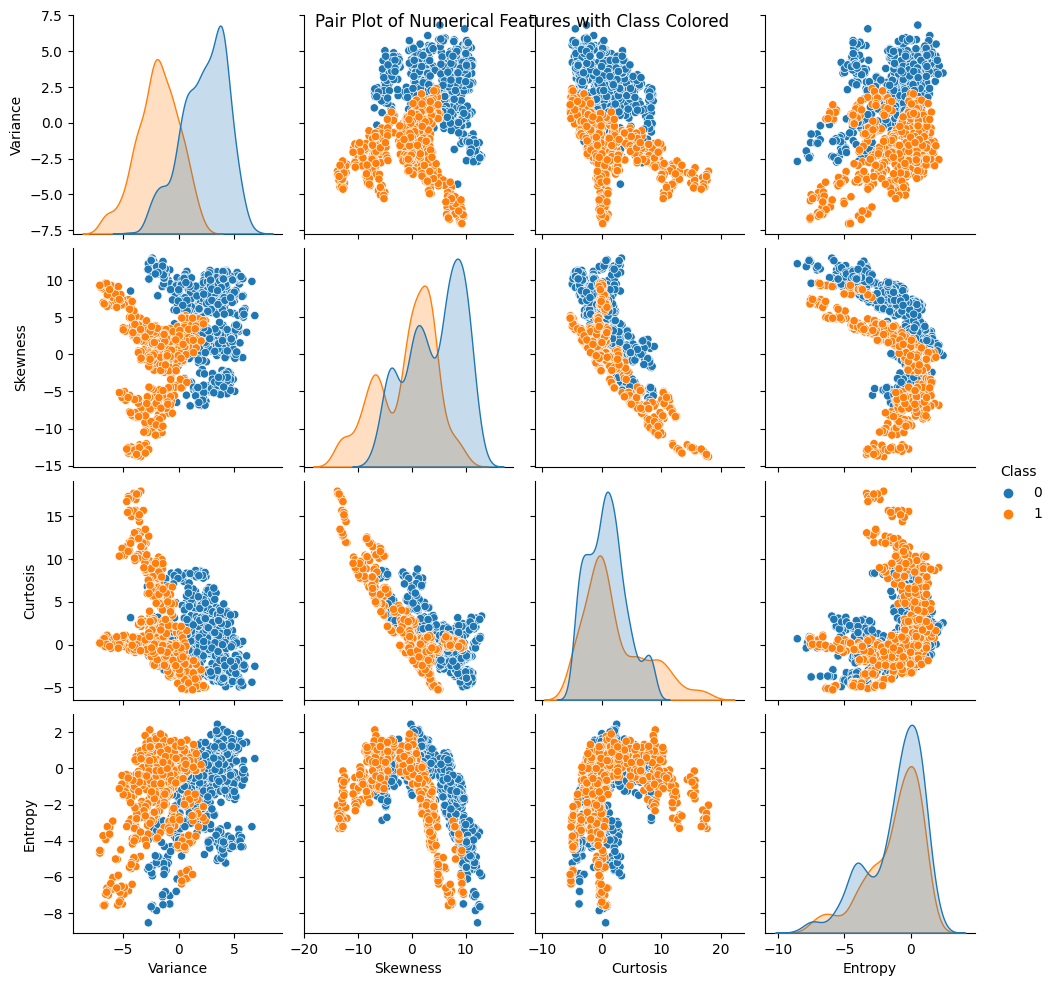

In [ ]:
import seaborn as sns
sns.pairplot(df.compute(), hue='Class')
plt.suptitle('Pair Plot of Numerical Features with Class Colored')
plt.show()


## Box plot

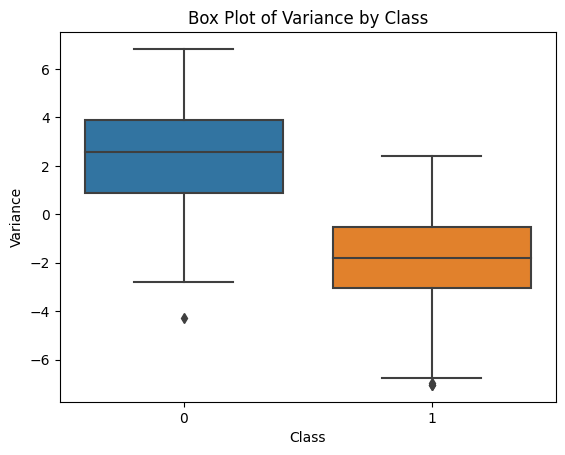

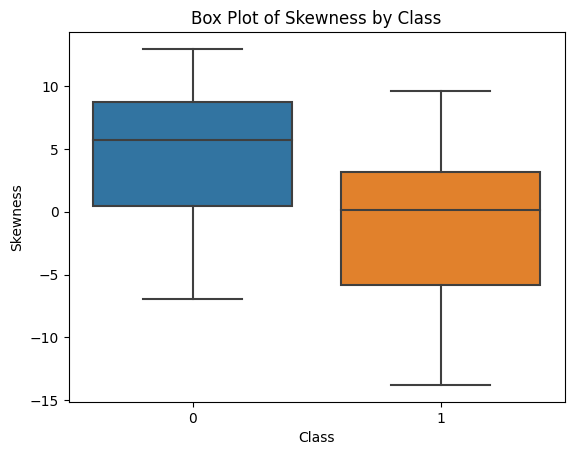

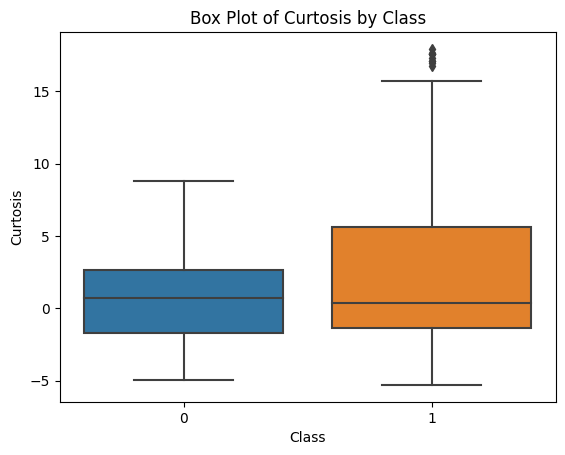

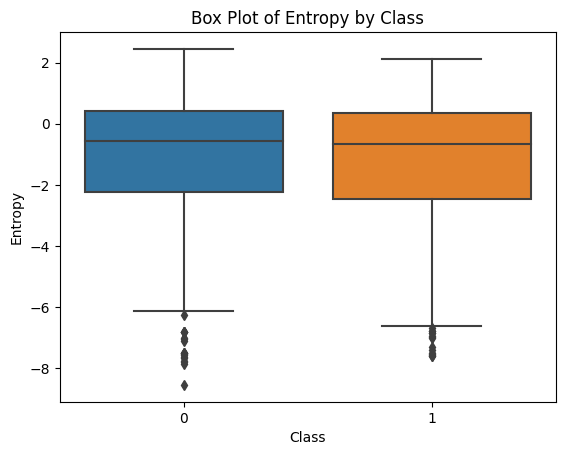

In [ ]:
for feature in ['Variance', 'Skewness', 'Curtosis', 'Entropy']:
    sns.boxplot(x='Class', y=feature, data=df.compute())
    plt.title(f'Box Plot of {feature} by Class')
    plt.show()


## Heat map


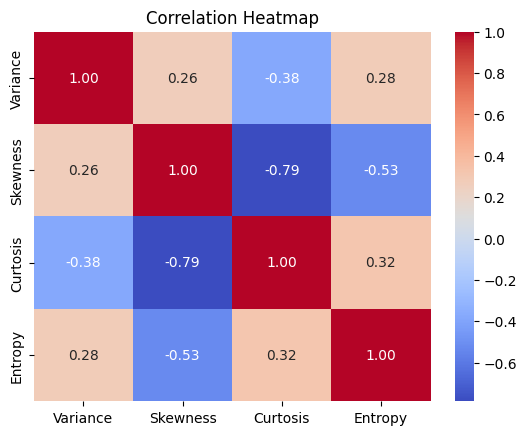

In [ ]:
correlation_matrix = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']].compute().corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Model Training


In [ ]:
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LogisticRegression
from dask_ml.metrics import accuracy_score


In [ ]:
X = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = df['Class']
## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Build a Logistic Regression model
model = LogisticRegression()

/usr/local/lib/python3.10/dist-packages/dask_ml/model_selection/_split.py:462: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(


In [ ]:
model.fit(X_train.values.compute(), y_train.values.compute())


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test.values.compute())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[70  0]
 [ 1 61]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.98      0.99        62

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132



In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred) )
print('Mean Squared Error : ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error : 0.007575757575757576
Mean Squared Error :  0.007575757575757576
Root Mean Squared Error :  0.08703882797784893


In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=2000, multi_class='auto')


In [ ]:
model.fit(X_train,y_train)


LogisticRegression(max_iter=2000)

In [ ]:
model.score(X_test,y_test)


0.9848484848484849